In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['class']=df['class'].map({'ham':0, 'spam':1})

In [8]:
df.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv=CountVectorizer()

In [11]:
x=df['message']
y=df['class']

In [12]:
x.shape

(5572,)

In [13]:
y.shape

(5572,)

In [14]:
x=cv.fit_transform(x)

In [15]:
x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

1.The Cat
2.The Dog
3.The Bird

    The Cat Dog Bird
1.  1  1   0   0
2.  1   0   1   0
3.  1   0  0  1

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.2)

In [18]:
x_train.shape

(4457, 8672)

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
model=MultinomialNB()

In [21]:
model.fit(x_train,y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(x_test) # prediksi

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[974,  17],
       [  9, 115]], dtype=int64)

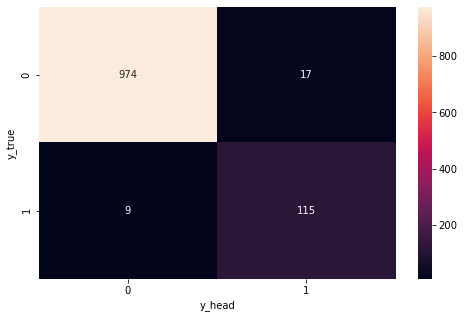

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [26]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       991
           1       0.87      0.93      0.90       124

    accuracy                           0.98      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
result=model.score(x_test, y_test)

In [23]:
result=result*100

In [24]:
result

98.9237668161435

In [25]:
import pickle

In [26]:
pickle.dump(model,open("spam.pkl","wb"))

In [27]:
pickle.dump(cv,open("vectorizer.pkl","wb"))

In [28]:
clf=pickle.load(open("spam.pkl","rb"))

In [29]:
clf

MultinomialNB()

In [30]:
msg="You win 10 Dollar"
data=[msg]
vect=cv.transform(data).toarray()
result=model.predict(vect)
print(result)

[1]
